In [30]:
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image
import matplotlib.animation as animation
from IPython.display import HTML
from skimage import draw
%matplotlib inline
from IPython.display import Video
#comment

In [31]:
def plot_images(img_list):
    def init():
        img.set_data(img_list[0])
        return (img,)

    def animate(i):
        img.set_data(img_list[i])
        return (img,)

    plt.figure(figsize = (15,15))
    fig = plt.figure()
    ax = fig.gca()
    img = ax.imshow(img_list[0])
    anim = animation.FuncAnimation(fig, animate, init_func=init,
                                 frames=len(img_list), interval=20, blit=True)
    return anim


In [32]:
class World():
    def __init__(self,rocket,target,width=768,height=640,stop_limit=100):
        self.rocket = rocket
        self.target = target
        self.width = width
        self.height = height
        self.time = 0
        self.stop_limit = stop_limit
        self.worlds = [np.ones((width,height),dtype=np.uint8)]
        self.distance = []


    def gen_img(self,world):
        buff = np.array((world,world,world))*255
        return buff.reshape(self.width,self.height,3)

    def run(self):
        print("Run the world")

        while True:
            self.time = self.time + 1
            xt,yt = self.target.move(self.time)
            xr,yr = self.rocket.move(self.time,self.target)
            self.distance.append(np.linalg.norm(np.array([xt,yt])-np.array([xr,yr])))
            rt, ct = draw.disk((int(xt), int(yt)), radius=10) #, shape=self.worlds[-1].shape)
            self.worlds[-1][rt,ct]=0
            rr, cr = draw.disk((int(xr), int(yr)), radius=10) #, shape=self.worlds[-1].shape)
            self.worlds[-1][rr,cr]=0
            self.worlds.append(np.ones((self.width,self.height),dtype=np.uint8))
            if self.time>self.stop_limit:
                print(len(self.worlds))
                print("Stop the world")
                break
            if self.distance[-1]<10:
                break
        return self.worlds


In [33]:
class Target():
    def __init__(self,r1,f1,r2,f2,x0,y0):
        self.x0 = x0
        self.y0 = y0
        self.r1 = r1
        self.f1 = f1
        self.r2 = r2
        self.f2 = f2
        self.move(0)
        
        self.a = 2 * np.pi * self.f1
        self.b = 2 * np.pi * self.f2

    def move(self,time):
        self.x = self.x0 + self.r1 * np.cos(time*2*np.pi*self.f1) + self.r2 * np.cos(time*2*np.pi*self.f2)
        self.y = self.y0 + self.r1 * np.sin(time*2*np.pi*self.f1) + self.r2 * np.sin(time*2*np.pi*self.f2)
        return (self.x,self.y)

class RectRocket():
    def __init__(self,x0,y0,v,angle):
        self.x0 = x0
        self.y0 = y0
        self.x = x0
        self.y = y0
        self.v = v
        self.angle = angle
        
        self.memory = []
        self.memory_cnt = 10

    def move(self, time: int, target: Target):
        # Put your code here
        # Calculate your angle and apply it to new (x,y) coords
        # Steps:
        # 1. Calculate alpha angle
        # 2. Calcualte new_coordinates
        
        if self.memory_cnt > 0:
            self.memory_cnt -= 1
            self.memory.append(target)
            self.y0 -= self.v
            return self.x, self.y

        return self.x, self.y  
        

Run the world
102
Stop the world


<Figure size 1500x1500 with 0 Axes>

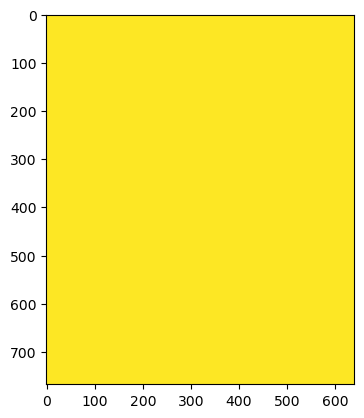

In [34]:
rocket = RectRocket(600,320,5,0)
target = Target(250,0.01,5,0.01,400,320)
world = World(rocket, target, stop_limit=100)

animation = plot_images(world.run())
#anim.save('animation.mp4', writer='ffmpeg')
animation.save('animation.mp4', writer='ffmpeg')

#HTML(plot_images(world.run()).to_html5_video())

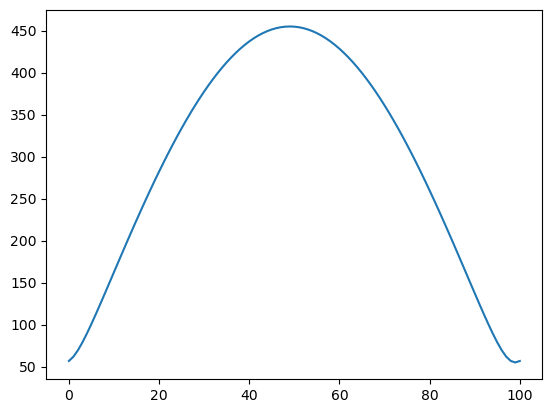

In [22]:
plt.plot(world.distance)